In [368]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import StrMethodFormatter
from datetime import datetime, timezone

In [369]:
# Save data in a DataFrame
data = pd.read_csv('/content/clean_secular_talk_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   videoId           19999 non-null  object 
 1   title             19999 non-null  object 
 2   description       19622 non-null  object 
 3   tags              19570 non-null  object 
 4   publishedAt       19999 non-null  object 
 5   duration          19999 non-null  object 
 6   category          19999 non-null  object 
 7   viewCount         19999 non-null  int64  
 8   likeCount         19999 non-null  int64  
 9   commentCount      19998 non-null  float64
 10  duration_seconds  19999 non-null  int64  
 11  duration_minutes  19999 non-null  float64
 12  duration_hours    19999 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 2.0+ MB


In [370]:
from re import error
# return videos for which likeCount > viewCount
error_data = data[data["likeCount"] > data["viewCount"]]
# count errors
error_data['videoId'].count()

np.int64(2)

In [371]:
# filter videos that last more than 3 hours
data = data.loc[data["duration_seconds"] < 3 * 3600].copy()

# delete videos with more like than views
data = data[~(data["likeCount"] > data["viewCount"])]

# filter counts
attributes = [
    "publishedAt",
    "viewCount",
    "likeCount",
    "commentCount",
    "duration_hours",
    "title"
]

data = data[attributes]

# clean date column
data['publishedAt'] = pd.to_datetime(data['publishedAt'])

# filter data from 1/1/2020 to 12/31/2025
data = data[data["publishedAt"].between("2020-01-01", "2025-12-31 23:59:59")]

In [372]:
# metrics
data["like_rate"] = 100 * data["likeCount"] / data["viewCount"]
data["comment_rate"] = 100 * data["commentCount"] / data["viewCount"]

In [373]:
# Explore data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9305 entries, 13 to 9324
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   publishedAt     9305 non-null   datetime64[ns, UTC]
 1   viewCount       9305 non-null   int64              
 2   likeCount       9305 non-null   int64              
 3   commentCount    9305 non-null   float64            
 4   duration_hours  9305 non-null   float64            
 5   title           9305 non-null   object             
 6   like_rate       9305 non-null   float64            
 7   comment_rate    9305 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(4), int64(2), object(1)
memory usage: 654.3+ KB


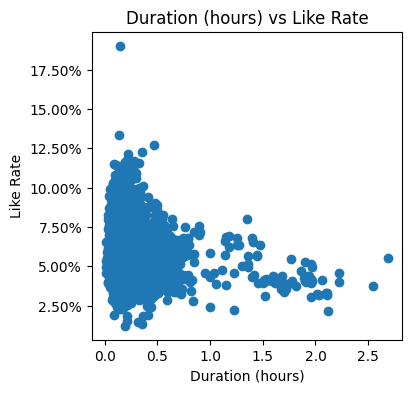

In [374]:
# 1. duration_hours vs like_rate
plt.figure(figsize=(4, 4))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}%'))
plt.scatter(data["duration_hours"], data["like_rate"])
plt.xlabel("Duration (hours)")
plt.ylabel("Like Rate")
plt.title("Duration (hours) vs Like Rate")
plt.show()

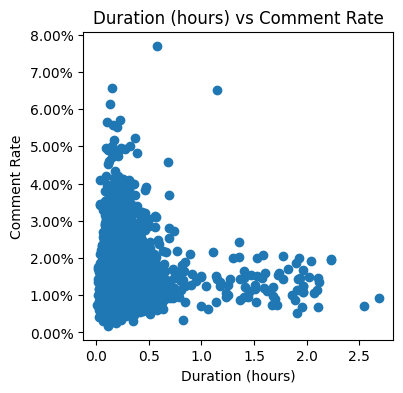

In [375]:
# 2. duration_hours vs comment_rate
plt.figure(figsize=(4, 4))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}%'))
plt.scatter(data["duration_hours"], data["comment_rate"])
plt.xlabel("Duration (hours)")
plt.ylabel("Comment Rate")
plt.title("Duration (hours) vs Comment Rate")
plt.show()

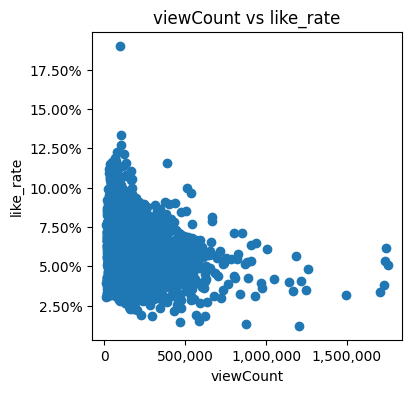

In [376]:
# 3. viewCount vs like_rate
plt.figure(figsize=(4, 4))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}%'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.scatter(data["viewCount"], data["like_rate"])
plt.xlabel("viewCount")
plt.ylabel("like_rate")
plt.title("viewCount vs like_rate")
plt.show()

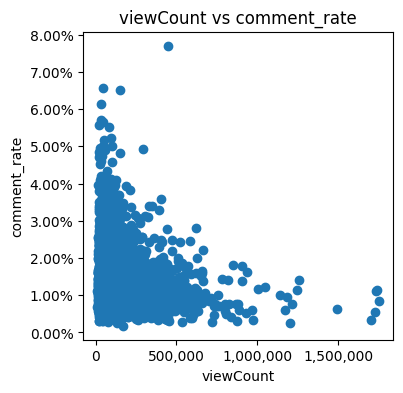

In [377]:
# 4. viewCount vs comment_rate
plt.figure(figsize=(4, 4))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}%'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.scatter(data["viewCount"], data["comment_rate"])
plt.xlabel("viewCount")
plt.ylabel("comment_rate")
plt.title("viewCount vs comment_rate")
plt.show()

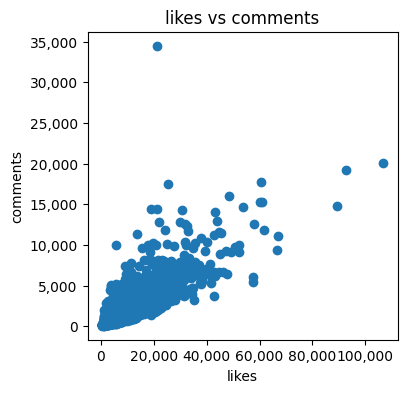

In [378]:
# 5. likes vs comments
plt.figure(figsize=(4, 4))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.scatter(data["likeCount"], data["commentCount"])
plt.xlabel("likes")
plt.ylabel("comments")
plt.title("likes vs comments")
plt.show()

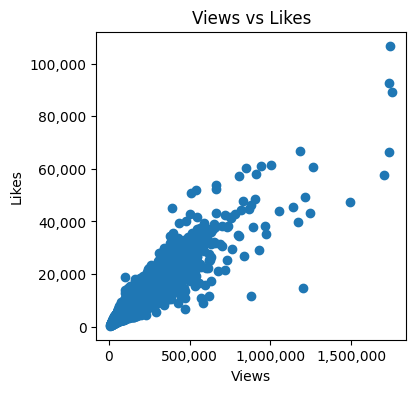

In [379]:
# 6. views vs likes
plt.figure(figsize=(4, 4))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.scatter(data["viewCount"], data["likeCount"])
plt.xlabel("Views")
plt.ylabel("Likes")
plt.title("Views vs Likes")
plt.show()

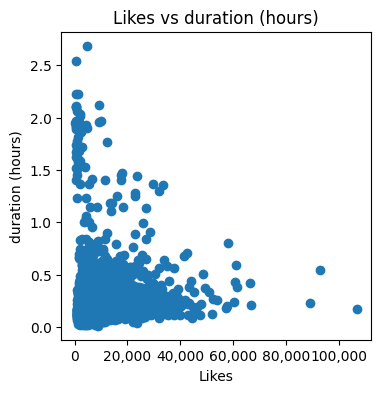

In [380]:
# 7. likes vs duration_hours
plt.figure(figsize=(4, 4))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.scatter(data["likeCount"], data["duration_hours"])
plt.xlabel("Likes")
plt.ylabel("duration (hours)")
plt.title("Likes vs duration (hours)")
plt.show()

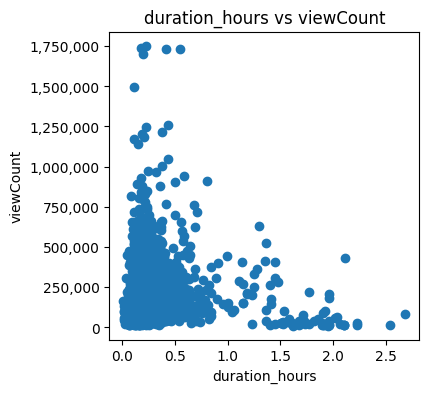

In [381]:
# 8. duration_hours vs viewCount
plt.figure(figsize=(4, 4))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
#plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
plt.scatter(data["duration_hours"], data["viewCount"])
plt.xlabel("duration_hours")
plt.ylabel("viewCount")
plt.title("duration_hours vs viewCount")
plt.show()

In [382]:
# top 5 videos with the highest number of likes
top5 = data.nlargest(5, "likeCount")
print(top5[["title", "publishedAt"]])
print(top5["likeCount"].map(lambda x: f"{x:,.0f}"))

                                                  title  \
1663  Anonymous Issues DIRE WARNING To MAGA | The Ky...   
509   New Charlie Kirk Evidence CHANGES EVERYTHING! ...   
1794  ‘REVOLUTION IS COMING’: CNN Guest Delivers DIR...   
742   Maddow Delivers CHILLING Warning You Have To S...   
842   TRUMP’S DARKEST EPSTEIN SECRET REVEALED | The ...   

                   publishedAt  
1663 2025-02-10 20:30:01+00:00  
509  2025-09-24 19:30:06+00:00  
1794 2025-01-14 18:00:06+00:00  
742  2025-08-06 21:30:03+00:00  
842  2025-07-21 20:15:06+00:00  
1663    106,804
509      92,740
1794     89,100
742      66,856
842      66,472
Name: likeCount, dtype: object


In [383]:
# top 5 videos with the highest number of comments
top5 = data.nlargest(5, "commentCount")
print(top5[["title", "publishedAt"]])
print(top5["commentCount"].map(lambda x: f"{x:,.0f}"))

                                                  title  \
7306      Kyle Addresses Jimmy Dore & Aaron Mate vs TYT   
1663  Anonymous Issues DIRE WARNING To MAGA | The Ky...   
509   New Charlie Kirk Evidence CHANGES EVERYTHING! ...   
1603      EXCLUSIVE: DID TRUMP STEAL THE 2024 ELECTION?   
988   ‘ARE YOU INSANE!’: HEATED Debate EXPLODES With...   

                   publishedAt  
7306 2021-06-30 14:00:04+00:00  
1663 2025-02-10 20:30:01+00:00  
509  2025-09-24 19:30:06+00:00  
1603 2025-02-21 22:00:06+00:00  
988  2025-06-20 21:59:06+00:00  
7306    34,499
1663    20,053
509     19,168
1603    17,712
988     17,545
Name: commentCount, dtype: object


In [384]:
# top 5 videos with the highest number of views
top5 = data.nlargest(5, "viewCount")
print(top5[["title", "publishedAt"]])
print(top5["viewCount"].map(lambda x: f"{x:,.0f}"))

                                                  title  \
1794  ‘REVOLUTION IS COMING’: CNN Guest Delivers DIR...   
1663  Anonymous Issues DIRE WARNING To MAGA | The Ky...   
509   New Charlie Kirk Evidence CHANGES EVERYTHING! ...   
842   TRUMP’S DARKEST EPSTEIN SECRET REVEALED | The ...   
2448  Jon Stewart Visibly SHOCKED At Trump’s Descent...   

                   publishedAt  
1794 2025-01-14 18:00:06+00:00  
1663 2025-02-10 20:30:01+00:00  
509  2025-09-24 19:30:06+00:00  
842  2025-07-21 20:15:06+00:00  
2448 2024-08-14 19:00:17+00:00  
1794    1,753,384
1663    1,739,596
509     1,735,207
842     1,730,804
2448    1,704,074
Name: viewCount, dtype: object


In [385]:
# top 5 videos with the highest like rates
top5 = data.nlargest(5, "like_rate")
print(top5[["title", "publishedAt"]])
print(top5["like_rate"].map(lambda x: f"{x:,.2f}%"))

                                                  title  \
7683     YouTube OBLITERATING Independent Media's Reach   
7364                                THANK YOU From Kyle   
7557  SHOCK: YouTube CEO Details EXACTLY How Indepen...   
268   WATCH: ICE ASSAULTS NON-VERBAL AUTISTIC SPECIA...   
272   Israel CAUGHT Using ‘Thermobaric’ Bomb That ‘M...   

                   publishedAt  
7683 2021-03-24 21:00:14+00:00  
7364 2021-06-14 18:30:09+00:00  
7557 2021-04-26 18:05:14+00:00  
268  2025-11-11 20:05:06+00:00  
272  2025-11-10 22:35:00+00:00  
7683    19.03%
7364    13.36%
7557    12.72%
268     12.24%
272     12.12%
Name: like_rate, dtype: object


In [386]:
# top 5 videos with the highest comment rates
top5 = data.nlargest(5, "comment_rate")
print(top5[["title", "publishedAt"]])
print(top5["comment_rate"].map(lambda x: f"{x:,.2f}%"))

                                                  title  \
7306      Kyle Addresses Jimmy Dore & Aaron Mate vs TYT   
6826   Biden Vax Mandate SHOT DOWN By 5th Circuit Court   
3908  SPICY DEBATE w/ Briahna Joy Gray On Cornel Wes...   
5894  Ukraine Bans Russian Books, Music & Opposition...   
6185  Alabama Law BANS Doctors Treating Trans Teens ...   

                   publishedAt  
7306 2021-06-30 14:00:04+00:00  
6826 2021-11-08 23:49:44+00:00  
3908 2023-09-08 17:45:33+00:00  
5894 2022-06-22 19:15:00+00:00  
6185 2022-04-14 20:30:02+00:00  
7306    7.70%
6826    6.56%
3908    6.50%
5894    6.15%
6185    5.71%
Name: comment_rate, dtype: object
